In [1]:
import numpy as np
import cv2

# Q1

In [2]:
A = np.array([[2,3,9]])

In [3]:
T = np.array([[8,0,5]]).T

In [4]:
T

array([[8],
       [0],
       [5]])

In [5]:
scale = 2

In [6]:
zero = np.array([[0,0,0]])

In [7]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Projection matrix

In [8]:
proj_mat = np.concatenate((1*np.identity(3),zero),axis=0)
last_column = np.concatenate((scale*T,np.array([[1]])),axis=0)
proj_mat = np.concatenate((proj_mat,last_column),axis=1)
proj_mat

array([[ 1.,  0.,  0., 16.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 10.],
       [ 0.,  0.,  0.,  1.]])

## result point

In [9]:
A_h = np.concatenate((A,np.array([[1]])),axis=1)
np.matmul(proj_mat,A_h[0])

array([18.,  3., 19.,  1.])

# Q2

In [11]:
M = np.array([[-2872.0, 1744.3, -138.7, 77270.0],[-273.9, -174.8, -3287.5, 94116.0],[-0.7380, -0.6480, -0.1883, 75.633]], dtype = 'float')
M

array([[-2.8720e+03,  1.7443e+03, -1.3870e+02,  7.7270e+04],
       [-2.7390e+02, -1.7480e+02, -3.2875e+03,  9.4116e+04],
       [-7.3800e-01, -6.4800e-01, -1.8830e-01,  7.5633e+01]])

In [14]:
from scipy import linalg


In [16]:
r, q = linalg.rq(M)

## instrinsic

In [17]:
r

array([[ 0.00000000e+00, -3.20613655e+03, -2.86287766e+00,
        -7.72766704e+04],
       [ 0.00000000e+00,  0.00000000e+00,  3.18372334e+03,
        -9.41201285e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -7.56396106e+01]])

## extrinsic

In [18]:
q

array([[ 7.23021526e-01,  6.30085892e-01,  2.82946132e-01,
         1.31578055e-02],
       [ 6.60436024e-01, -7.50714273e-01, -1.58851168e-02,
        -2.71340610e-05],
       [ 2.02407845e-01,  1.98359411e-01, -9.59001018e-01,
         1.28692497e-03],
       [ 9.75679269e-03,  8.56693992e-03,  2.48943640e-03,
        -9.99912604e-01]])

# Q3

In [19]:
import matplotlib.pyplot as plt

In [22]:
baboon = cv2.imread('baboon.tiff')

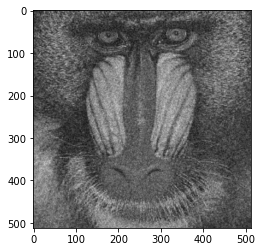

In [49]:

plt.imshow(baboon,cmap='gray')

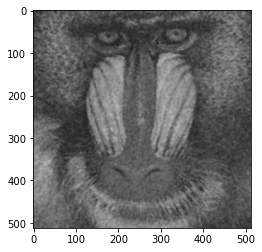

In [66]:
median_filtered = cv2.medianBlur(baboon,5)
plt.imshow(median_filtered, cmap='gray')

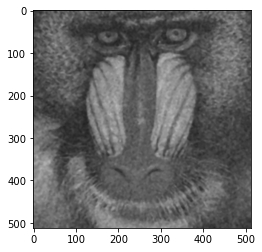

In [67]:
gblur = cv2.GaussianBlur(median_filtered,(3,3),8,cv2.BORDER_DEFAULT)
plt.imshow(gblur, cmap='gray')

### denoising done

In [68]:
ddepth=cv2.CV_64F
from scipy import ndimage

In [133]:
x_grad = cv2.Sobel(gblur, ddepth=ddepth, dx=1,dy=0,ksize=3)
y_grad = cv2.Sobel(gblur, ddepth=ddepth, dx=0,dy=1,ksize=3)
xy = cv2.Sobel(gblur, ddepth=ddepth, dx=1, dy=1, ksize=3)
mag_grad_1 = np.sqrt(np.square(x_grad/255)+np.square(y_grad/255))
orientation_tiger = np.arctan(y_grad/x_grad)
mag_grad_2 = np.sqrt(np.square(x_grad)+np.square(y_grad))


/tmp/ipykernel_4286/4165547293.py:5: RuntimeWarning: divide by zero encountered in true_divide
  orientation_tiger = np.arctan(y_grad/x_grad)
/tmp/ipykernel_4286/4165547293.py:5: RuntimeWarning: invalid value encountered in true_divide
  orientation_tiger = np.arctan(y_grad/x_grad)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


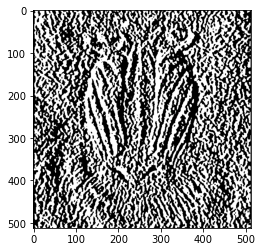

In [134]:
plt.imshow(x_grad)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


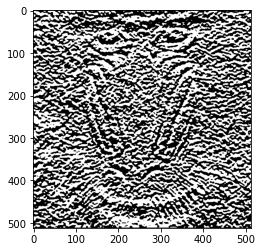

In [135]:
plt.imshow(y_grad)

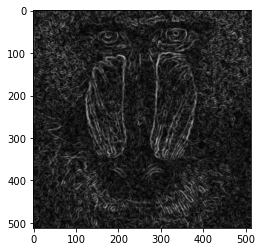

In [136]:
plt.imshow(mag_grad)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


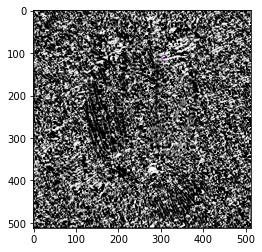

In [137]:
plt.imshow(orientation_tiger, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


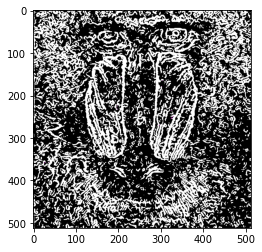

In [138]:
ret, bw_img = cv2.threshold(mag_grad_2, 35, 256, cv2.THRESH_BINARY)

plt.imshow(bw_img)
  